<h1 align='center'><b>Введение в нейронные сети<b></h1>

<h1 align='left'>Урок 2. Keras</h1>

<h2 align='center'>Домашняя работа</h2>

Возьмите набор примеров fashion-MNIST

1. Опишите - какой результат нейросети получен в зависимости от:<br>
    a. числа нейронов в слое (для 2-х слойной сети),<br>
    b. числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).<br>
    c. фиксируйте для тренировочного и тестового набора метрики accuracy.<br>

2. Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

4. Для одного варианта сети сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота, точность).

In [1]:
# !pip install keras
# !pip install python-mnist

In [2]:
# keras.__version__

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
import itertools
import keras

from keras.datasets import fashion_mnist
from keras.utils.vis_utils import plot_model
from keras.layers import Dense
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
tf.random.set_seed(42)

In [5]:
(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()
print(X_train.shape, X_test.shape)
print(y_train_labels.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,)


Label is 1


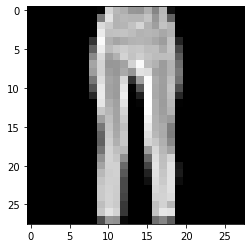

In [6]:
ind = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[ind], cmap='gray')
print(f'Label is {y_train_labels[ind]}')

Набор из 60 000 полутоновых изображений 28х28 серого цвета 10 категорий моды, а также тестовый набор из 10 000 изображений.<br>
Классовые метки:<br>
   * 0 - футболка/клубка<br>
   * 1 - Брюки<br>
   * 2 - Пуловер<br>
   * 3 - Платье<br>
   * 4 - Пальто<br>
   * 5 - Сандал<br>
   * 6 - Рубашка<br>
   * 7 - Кроссовок<br>
   * 8 - Сумка<br>
   * 9 - Ботинок

Конвертируем значения пикселей из вида от 0 до 255 в набор значений от 0 до 1.

In [7]:
X_train.min(), X_train.max()

(0, 255)

In [8]:
# Нормировка
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.min(), X_train.max()

(0.0, 1.0)

In [9]:
# Вытягивание признаков
X_train = X_train.reshape((-1, 28 * 28))
X_test = X_test.reshape((-1, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

Передача данных для обучения нейросети

In [10]:
y_train_labels[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [11]:
y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

y_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Задание 1. Опишите - какой результат нейросети получен в зависимости от:
    a. числа нейронов в слое (для 2-х слойной сети),
    b. числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).
    c. фиксируйте для тренировочного и тестового набора метрики accuracy.

### a. Проверим качество в зависимости от числа нейронов в слое (для 2-х слойной сети).

In [12]:
%%time

results_num = pd.DataFrame()
n_nums = [] # число нейронов скрытых слоев
train_losses = [] # ошибка на тренировочной выборке
test_losses = [] # ошибка на тестовой выборке
train_metrics = [] # accuracy на тренировочной выборке
test_metrics = [] # accuracy на тестовой выборке


for n_num in list(map(lambda x: 2**x, range(0,10))):
    
    n_nums.append(n_num)
    
    model = Sequential([
        Dense(64, input_shape=(28 * 28,), activation='relu'),
        Dense(n_num, activation='relu'),
        Dense(10, activation='sigmoid')
    ])
    
    model.summary()
    
    # Компиляция модели
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train,
                       epochs=5,
                       batch_size=64,
                       verbose=1,
                       validation_data=(X_test, y_test)
                       )
    
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    train_loss, train_metric = model.evaluate(X_train, y_train, batch_size=64)
    train_losses.append(train_loss)
    train_metrics.append(train_metric)
    
    test_loss, test_metric = model.evaluate(X_test, y_test, batch_size=64)
    test_losses.append(test_loss)
    test_metrics.append(test_metric)
    
    
results_num['n_num'] = n_nums
results_num['train_loss'] = train_losses
results_num['test_loss'] = test_losses
results_num['train_metric'] = train_metrics
results_num['test_metric'] = test_metrics
results_num.sort_values(by='test_metric', ascending=False)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
 dense_2 (Dense)             (None, 10)                20        
                                                                 
Total params: 50,325
Trainable params: 50,325
Non-trainable params: 0
_________________________________________________________________


2022-12-07 01:09:42.746588: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-07 01:09:42.782519: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-12-07 01:09:42.782538: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-12-07 01:09:42.783010: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

Epoch 1/5
938/938 [==============================] - 1s 1ms/step - loss: 2.0610 - accuracy: 0.1880 - val_loss: 1.9523 - val_accuracy: 0.2145
Epoch 2/5
938/938 [==============================] - 1s 1ms/step - loss: 1.8919 - accuracy: 0.2200 - val_loss: 1.8607 - val_accuracy: 0.2310
Epoch 3/5
938/938 [==============================] - 1s 1ms/step - loss: 1.8219 - accuracy: 0.2463 - val_loss: 1.8073 - val_accuracy: 0.2553
Epoch 4/5
938/938 [==============================] - 1s 1ms/step - loss: 1.7765 - accuracy: 0.2697 - val_loss: 1.7684 - val_accuracy: 0.2696
Epoch 5/5
157/157 [==============================] - 0s 809us/step - loss: 1.7255 - accuracy: 0.3129
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 2)           

,n_num,train_loss,test_loss,train_metric,test_metric
6,64,0.477382,0.510851,0.826550,0.8141
8,256,0.482432,0.517040,0.824933,0.8120
7,128,0.481423,0.517337,0.824433,0.8117
5,32,0.492494,0.525194,0.818517,0.8100
9,512,0.485653,0.519744,0.823700,0.8100
4,16,0.490972,0.526251,0.823567,0.8088
3,8,0.531048,0.558927,0.808083,0.7991
2,4,0.589339,0.612015,0.777717,0.7670
1,2,1.062675,1.072344,0.579450,0.5732
0,1,1.714827,1.725547,0.318500,0.3129


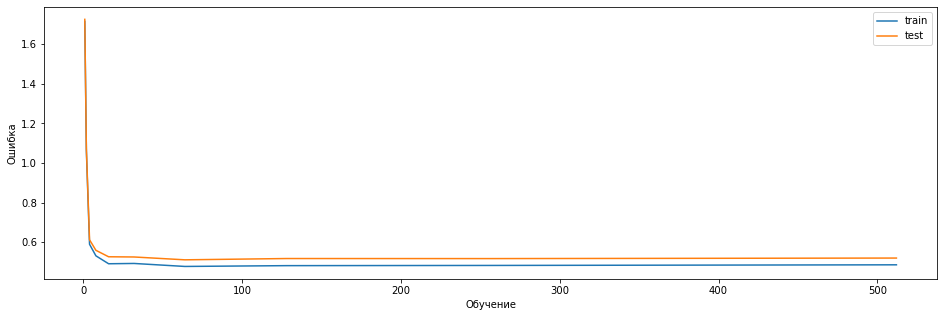

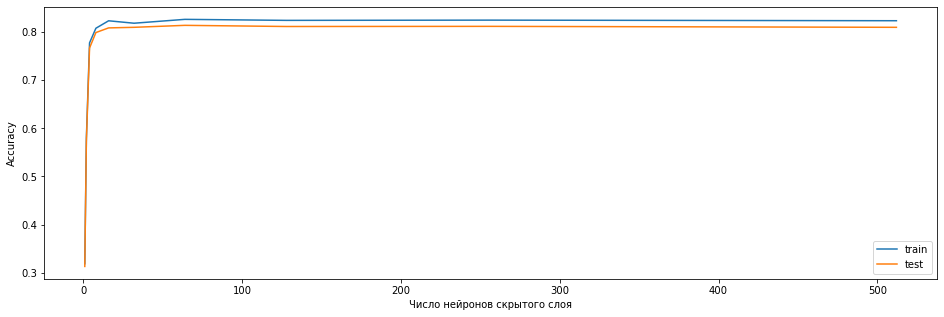

In [13]:
# Демонстрация полученных результатов
# Диаграмма точности в зависимости от обучения

plt.figure(figsize=(16,5))
plt.plot(results_num['n_num'], results_num['train_loss'], label='train')
plt.plot(results_num['n_num'], results_num['test_loss'], label='test')
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

plt.figure(figsize=(16,5))
plt.plot(results_num['n_num'], results_num['train_metric'], label='train')
plt.plot(results_num['n_num'], results_num['test_metric'], label='test')
plt.xlabel('Число нейронов скрытого слоя')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Лучшее качество на тесте получилось при 128 нейронах.<br>
В общем тенденция такая: сначала, при увеличении числа нейронов скрытого слоя, качество росло, затем, начиная с некоторого количества (примерно 16), скорость роста сильно снизилась и качество почти вышло на констатное значение.

### b. Проверим качество в зависимости от числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров)

In [14]:
%%time
results_layers = pd.DataFrame()
n_nums = [] # число нейронов скрытых слоев
n_layers = [] # число скрытых слоев
n_pars = [] # число тренируемых параметров
train_losses = [] # ошибка на тренировочной выборке
test_losses = [] # ошибка на тестовой выборке
train_metrics = [] # accuracy на тренировочной выборке
test_metrics = [] # accuracy на тестовой выборке

# Базовый размер возьмем для двухслойной сети с 128 нейронами, и будем равняться на него
k_dict = {2:128, 3:67, 5:45, 10:30}

for n in [2, 3, 5, 10]:
    
    k = k_dict[n]
    net_size = 64 * 785 + 65 * k + (n - 2) * (k + 1) * k + (k + 1) * 10
    n_nums.append(k)
    n_pars.append(net_size)
    n_layers.append(n)
    
    model = Sequential()
    model.add(Dense(64, input_shape=(28 * 28,), activation='relu'))
    for i in range(n-1):
        model.add(Dense(k , activation='relu'))
    model.add(Dense(10, activation='sigmoid'))
    
    model.summary()
    
    # Компиляция модели
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train,
                       epochs=5,
                       batch_size=64,
                       verbose=1,
                       validation_data=(X_test, y_test)
                       )
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    train_loss, train_metric = model.evaluate(X_train, y_train, batch_size=64)
    train_losses.append(train_loss)
    train_metrics.append(train_metric)
    
    test_loss, test_metric = model.evaluate(X_test, y_test, batch_size=64)
    test_losses.append(test_loss)
    test_metrics.append(test_metric)
    
    
results_layers['n_layer'] = n_layers
results_layers['n_num'] = n_nums
results_layers['n_par'] = n_pars
results_layers['train_loss'] = train_losses
results_layers['test_loss'] = test_losses
results_layers['train_metric'] = train_metrics
results_layers['test_metric'] = test_metrics
results_layers.sort_values(by='test_metric', ascending=False)   

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 64)                50240     
                                                                 
 dense_31 (Dense)            (None, 128)               8320      
                                                                 
 dense_32 (Dense)            (None, 10)                1290      
                                                                 
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
938/938 [==============================] - 1s 1ms/step - loss: 1.0056 - accuracy: 0.6785 - val_loss: 0.7079 - val_accuracy: 0.7289
Epoch 2/5
938/938 [==============================] - 1s 1ms/step - loss: 0.5954 - accuracy: 0.7951 - val_loss: 0.5983 - val_accuracy: 0.7892
Epoch 3/5
938/938 [============

,n_layer,n_num,n_par,train_loss,test_loss,train_metric,test_metric
2,5,45,59835,0.456654,0.495092,0.836117,0.8203
1,3,67,59831,0.477226,0.514645,0.825700,0.8136
0,2,128,59850,0.499366,0.533453,0.817150,0.8045
3,10,30,59940,0.788159,0.822852,0.747700,0.7417


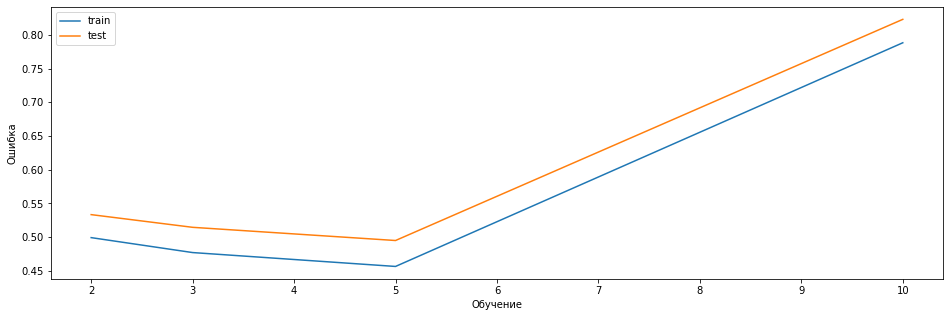

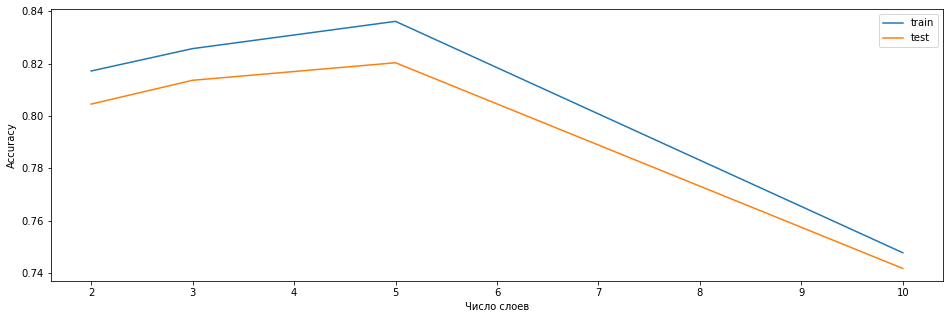

In [15]:
# Демонстрация полученных результатов
# Диаграмма точности в зависимости от обучения

plt.figure(figsize=(16, 5))
plt.plot(results_layers['n_layer'],results_layers['train_loss'], label='train')
plt.plot(results_layers['n_layer'],results_layers['test_loss'], label='test')
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(results_layers['n_layer'],results_layers['train_metric'], label='train')
plt.plot(results_layers['n_layer'],results_layers['test_metric'], label='test')
plt.xlabel('Число слоев')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Лучшее качество получилось на 5 слоях с 45 нейронами.<br>
На 2, 3 и 5 слоях качество и ошибка примерно соразмерны, на 10 слоях качество прилично просело. Может быть это связано с тем, что количество нейронов скрытых слоев ниже, чтобы сохранить общее количество тренируемых параметров.

### Задание 2. Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.

Лучшей оказалась модель с 5 слоями и 45 нейронами.
Посмотрим работу разных оптимизаторов (SGD, Adam, RMSProp) для этой модели.

Оптимизатор: SGD
Epoch 1/5
938/938 [==============================] - 2s 1ms/step - loss: 1.2616 - accuracy: 0.5346 - val_loss: 0.7668 - val_accuracy: 0.7001
Epoch 2/5
938/938 [==============================] - 1s 1ms/step - loss: 0.6239 - accuracy: 0.7736 - val_loss: 0.6555 - val_accuracy: 0.7659
Epoch 3/5
938/938 [==============================] - 1s 1ms/step - loss: 0.5264 - accuracy: 0.8134 - val_loss: 0.5518 - val_accuracy: 0.8079
Epoch 4/5
938/938 [==============================] - 1s 1ms/step - loss: 0.4829 - accuracy: 0.8294 - val_loss: 0.4924 - val_accuracy: 0.8260
Epoch 5/5
157/157 [==============================] - 0s 916us/step - loss: 0.5220 - accuracy: 0.8105
Качество на тесте: 0.5219538807868958, 0.8105000257492065
Оптимизатор: RMSprop
Epoch 1/5
938/938 [==============================] - 2s 2ms/step - loss: 0.6040 - accuracy: 0.7783 - val_loss: 0.6214 - val_accuracy: 0.7807
Epoch 2/5
938/938 [==============================] - 1s 2ms/step - loss: 0.4112 - accuracy: 0.8496

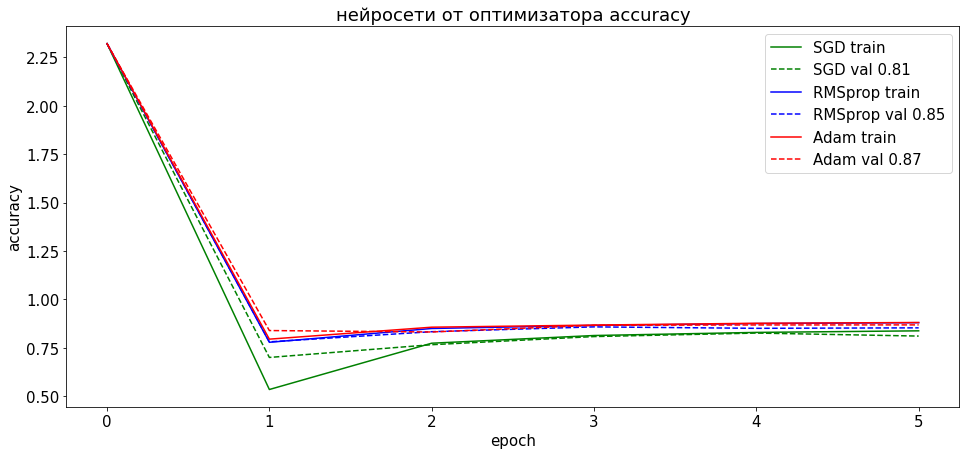

CPU times: user 50.1 s, sys: 4.02 s, total: 54.1 s
Wall time: 29.8 s


In [33]:
%%time

# создаем модель model
model = Sequential([
    Dense(64, activation='relu', input_shape=(28 * 28,)),
    Dense(45, activation='relu'),
    Dense(45, activation='relu'),
    Dense(45, activation='relu'),
    Dense(45, activation='relu'),    
    Dense(10, activation='sigmoid'),
])

# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model_weights.h5')

# будем сохранять модели в словарь
models = {}

plt.figure(figsize=(16, 7))
colors = ['g', 'b', 'r']

num_epochs = 5
batch_size = 64

# вектор для вывода результатов
epoch = np.arange(num_epochs+1)

# будем изменять оптимизаторы
for i, i_optim in enumerate([SGD(),
                            RMSprop(),
                            Adam()]):
    print(f'Оптимизатор: {i_optim.get_config()["name"]}')
    
    # создаем рабочую модель  model_i, куда будем загружать эти веса (она должна быть идентичной структуры)
    model_i = Sequential([
        Dense(64, activation='relu', input_shape=(28 * 28,)),
        Dense(45, activation='relu'),
        Dense(45, activation='relu'),
        Dense(45, activation='relu'),
        Dense(45, activation='relu'),   
        Dense(10, activation='sigmoid'),
    ])
    
    # загружаем веса model_i.load_weights('model.h5')
    model_i.load_weights('model_weights.h5')
    
    # компилируем model_i с одним из оптимизаторов
    model_i.compile(
        optimizer=i_optim,
        loss='categorical_crossentropy',        
        metrics=['accuracy'],    
    )
    
    # вычисляем ошибку для modeli без обучения
    h0_train = model_i.evaluate(X_train, y_train, verbose=0)
    h0_val = model_i.evaluate(X_test, y_test, verbose=0)
    
    # проводим обучение модели 
    h = model_i.fit(X_train, y_train,
                   epochs=num_epochs,
                   batch_size=batch_size,
                   validation_data=(X_test, y_test),
                   verbose=1)
    
    # вычисляем ошибку для modeli после обучения
    loss, metric = model_i.evaluate(X_test, y_test, batch_size=64)
    print(f'Качество на тесте: {loss}, {metric}')
    
    # записываем обученную модель в словарь
    models[i_optim.get_config()['name']] = model_i
    
    # картинки       
    plt.plot(epoch, ([h0_train[0]] + h.history['accuracy']),
             '-', c=colors[i],
             label=model_i.optimizer.get_config()['name'] + ' train')
    plt.plot(epoch, ([h0_val[0]] + h.history['val_accuracy']),
             '--', c=colors[i],
             label=f'{model_i.optimizer.get_config()["name"]} val {metric:.2f}')
    
plt.legend()
plt.title('нейросети от оптимизатора accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()    

### Задание 3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

Итоговое качество на тестовой выборке получилось 0.86 благодаря подбору оптимального количества скрытых слоев (5) и количества нейронов на них (45), а также выбору оптимизатора (Adam). 

In [34]:
model_i = models['Adam']

In [35]:
model_i.optimizer.get_config()

{'name': 'Adam',
 'learning_rate': 0.001,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

1/1 [==============================] - 0s 55ms/step


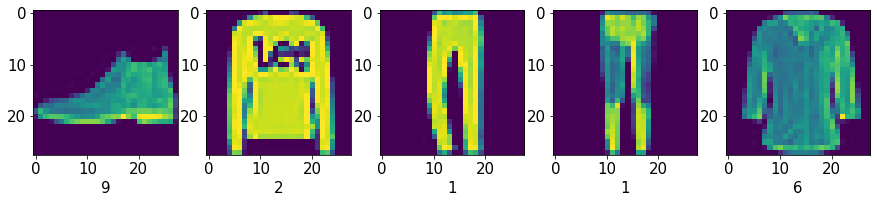

In [36]:
N = 5
y_pred = model_i.predict(X_test[:N, :])
y_pred_class = np.argmax(y_pred, axis=1)
plt.figure(figsize=(3 * N, 5))

for i in range(N):
    plt.subplot(1, N, i+1)
    plt.imshow(X_test[i, :].reshape(28, 28))
    # plt.xlabel(str(y_pred_class[i]))
    plt.xlabel(str(y_test_labels[i]))
plt.show()

In [37]:
y_pred_class

array([9, 2, 1, 1, 6])

### Задание 4. Для одного варианта сети сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота, точность).

In [38]:
y_pred = model_i.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)

313/313 [==============================] - 0s 741us/step


In [39]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


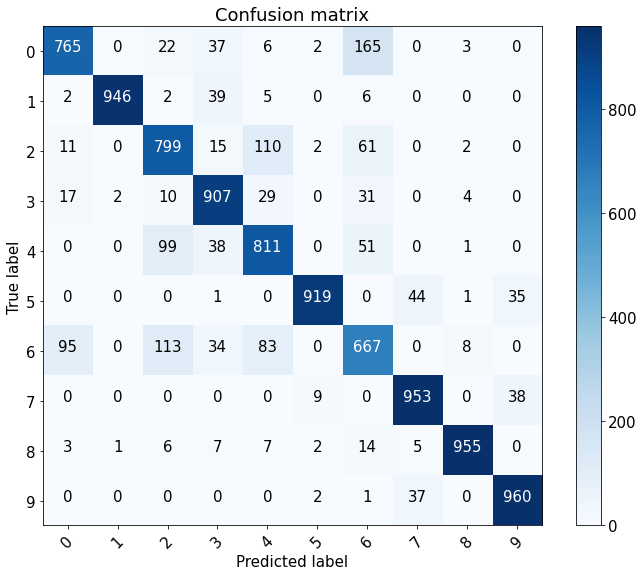

In [40]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test_labels, y_pred_class)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
                      title='Confusion matrix', normalize=False)
plt.show()

In [41]:
def get_precision_and_recall_from_confusion_matrix(label, cnf_matrix):
    str_sum = 0
    col_sum = 0
    for i in range(len(cnf_matrix)):
        str_sum += cnf_matrix[label][i]
        col_sum += cnf_matrix[i][label]
        
    return cnf_matrix[label][label] / str_sum, cnf_matrix[label][label] / col_sum

In [42]:
pr_rc_result = pd.DataFrame()
precisions = []
recalls = []
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for l in labels:
    p_r = get_precision_and_recall_from_confusion_matrix(l, cnf_matrix)
    precisions.append(p_r[0])
    recalls.append(p_r[1])
pr_rc_result['label'] = labels
pr_rc_result['precision'] = precisions
pr_rc_result['recall'] = recalls

In [43]:
pr_rc_result.sort_values(by='precision', ascending=False)

,label,precision,recall
9,9,0.960,0.929332
8,8,0.955,0.980493
7,7,0.953,0.917228
1,1,0.946,0.996839
5,5,0.919,0.981838
3,3,0.907,0.841373
4,4,0.811,0.771646
2,2,0.799,0.760228
0,0,0.765,0.856663
6,6,0.667,0.669679


In [44]:
pr_rc_result.sort_values(by='recall', ascending=False)

,label,precision,recall
1,1,0.946,0.996839
5,5,0.919,0.981838
8,8,0.955,0.980493
9,9,0.960,0.929332
7,7,0.953,0.917228
0,0,0.765,0.856663
3,3,0.907,0.841373
4,4,0.811,0.771646
2,2,0.799,0.760228
6,6,0.667,0.669679


In [28]:
d = {0: 'футболка/клубка',
     1: 'Брюки',
     2: 'Пуловер',
     3: 'Платье',
     4: 'Пальто',
     5: 'Сандал',
     6: 'Рубашка',
     7: 'Кроссовок',
     8: 'Сумка',
     9: 'Ботинок'}

Получилось, что точнее всего наша модель предсказывает ботинки, сумки и кроссовки. Интересно, что кроссовки и ботинки наверху списков, то есть модель их не путает. <br>
Хуже всего модель предсказывает футболки, пуловеры, пальто и рубашки. Их, видимо, проще спутать.

Посмотрим, ради интереса, на все представленные категории.

In [45]:
ind = []
for i in range(10):
    ind.append(np.where(y_test_labels == i)[0][0])

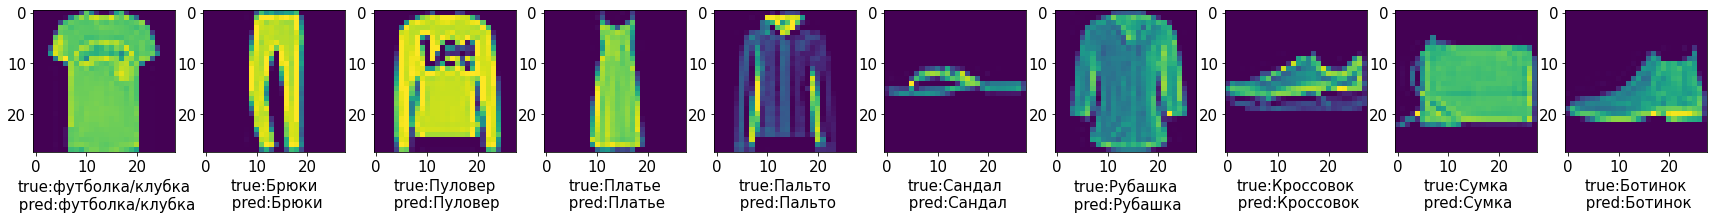

In [46]:
plt.figure(figsize=(3 * 10, 5))
k = 0
for i in ind:
    plt.subplot(1, 10, k+1)
    k+=1
    plt.imshow(X_test[i,:].reshape(28, 28))
    plt.xlabel('true:' + str(d[y_test_labels[i]]) + '\n pred:' + str (d[y_pred_class[i]]))
    
plt.show()